In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np


In [11]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/Colab Notebooks/"

titanic = pd.read_csv(file_path + "titanic_train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen Carrie",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
titanic["Cabin"] = titanic["Cabin"].fillna("Na")

In [15]:
titanic = titanic.dropna()

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        712 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [34]:
titanic["Age"].describe()


,Age
count,712.000000
mean,29.642093
std,14.492933
min,0.420000
25%,20.000000
50%,28.000000
75%,38.000000
max,80.000000


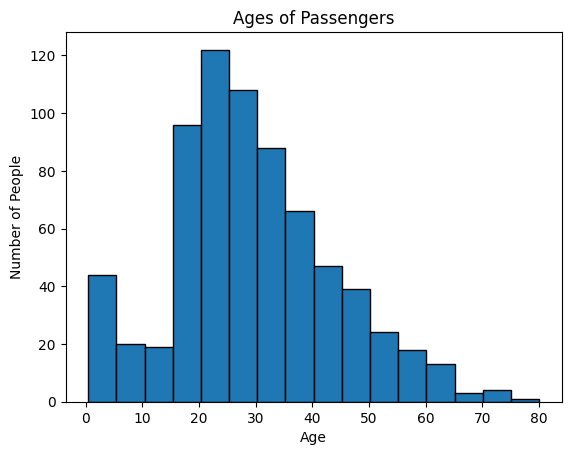

In [148]:
plt.hist(titanic["Age"], bins = 16,  edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Ages of Passengers")
plt.savefig("figure.png")

In [44]:
titanic.Pclass.describe()

,Pclass
count,712.000000
mean,2.240169
std,0.836854
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


In [53]:
Pclass = titanic["Pclass"].value_counts()

Text(0.5, 1.0, 'Passengers by Class')

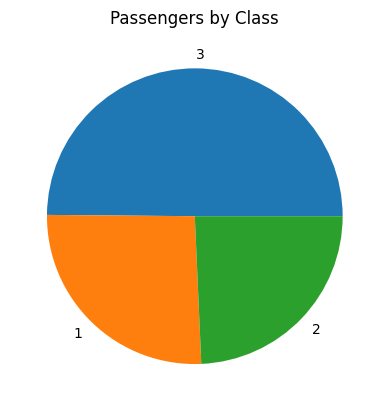

In [57]:
plt.pie(Pclass, labels = Pclass.index)
plt.title("Passengers by Class")

In [80]:
age = titanic["Age"]
fare = titanic["Fare"]

linear_model = scipy.stats.linregress(age, fare)
print(linear_model)

LinregressResult(slope=0.3402236813497706, intercept=24.482309504336047, rvalue=0.09314251789411515, pvalue=0.012904553407041563, stderr=0.13648826236155365, intercept_stderr=4.502879454808952)


In [102]:
slope = linear_model.slope
intercept = linear_model.intercept
rvalue = linear_model.rvalue
linear_fit = slope*age + intercept
linear_fit_equation = f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}'

Text(25, 350, 'Linear Fit: y = 0.34x + 24.48')

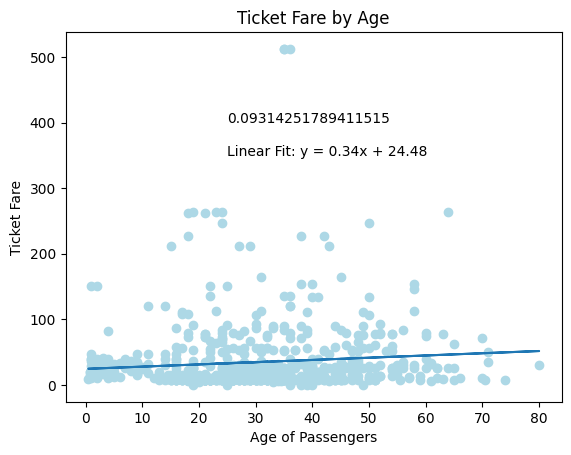

In [103]:
plt.scatter(age, fare, color = "lightblue")
plt.plot(age, linear_fit, label="Linear Fit")
plt.xlabel("Age of Passengers")
plt.ylabel("Ticket Fare")
plt.title("Ticket Fare by Age")
plt.text(25,400, rvalue)
plt.text(25, 350, linear_fit_equation)

In [105]:
import seaborn as sns

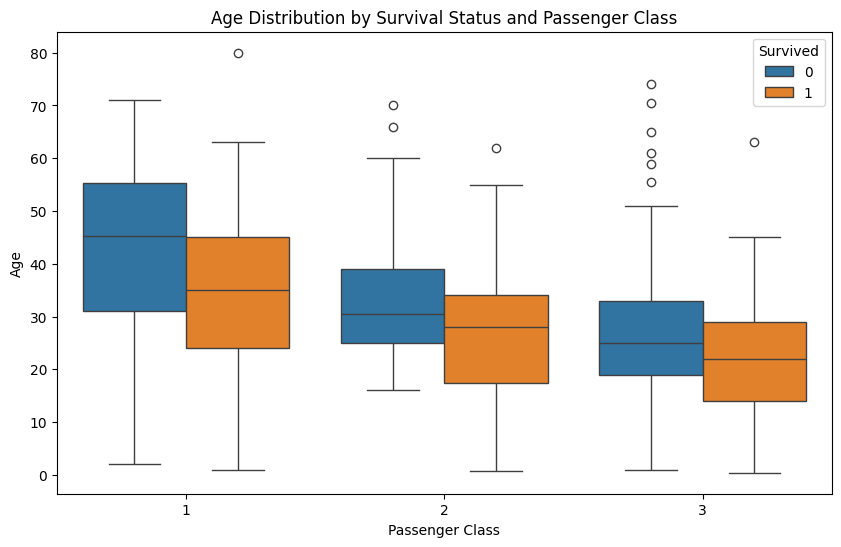

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic)

plt.title('Age Distribution by Survival Status and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')

plt.show()

In [107]:
corr_scores = titanic.corr(numeric_only = True)
print(corr_scores)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.029526 -0.035609  0.024674  0.033681 -0.082704   
Survived        0.029526  1.000000 -0.356462 -0.536762 -0.082446 -0.015523   
Pclass         -0.035609 -0.356462  1.000000  0.150826 -0.365902  0.065187   
Sex             0.024674 -0.536762  0.150826  1.000000  0.099037 -0.106296   
Age             0.033681 -0.082446 -0.365902  0.099037  1.000000 -0.307351   
SibSp          -0.082704 -0.015523  0.065187 -0.106296 -0.307351  1.000000   
Parch          -0.011672  0.095265  0.023666 -0.249543 -0.187896  0.383338   
Fare            0.009655  0.266100 -0.552893 -0.182457  0.093143  0.139860   

                Parch      Fare  
PassengerId -0.011672  0.009655  
Survived     0.095265  0.266100  
Pclass       0.023666 -0.552893  
Sex         -0.249543 -0.182457  
Age         -0.187896  0.093143  
SibSp        0.383338  0.139860  
Parch        1.000000  0.206624  
Fare         0.206624  1.

In [122]:
sex_class_crosstab = pd.crosstab(titanic['Sex'], titanic['Pclass'])
print(sex_class_crosstab)

Pclass    1   2    3
Sex                 
0        83  74  102
1       101  99  253


In [123]:
c, p, dof, expected = scipy.stats.chi2_contingency(sex_class_crosstab)
print("P-Value", p)
print()
print(c)
print()
print(dof)
print()
print(expected)

P-Value 0.00011828422058509222

18.08484036123574

2

[[ 66.93258427  62.93117978 129.13623596]
 [117.06741573 110.06882022 225.86376404]]


In [137]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [147]:
Ages_Q = titanic.query("Embarked=='Q'")['Age']
print("Median Age from Queenstown: ", Ages_Q.median())

Ages_S = titanic.query("Embarked=='S'")['Age']
print("Median Age from Southampton:", Ages_S.median())

Ages_C = titanic.query("Embarked=='C'")['Age']
print("Median Age from Cherbourg:", Ages_C.median())

Median Age from Queenstown:  27.0
Median Age from Southampton: 28.0
Median Age from Cherbourg: 29.0
